In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.12) on 2024-02-15 15:39.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


In [3]:
import os
os.chdir('D:/KP/mouse_brain_project')

In [4]:
import scanpy.external as sce

In [34]:
adata_1 = sc.read('WT_M_p5_non_immune_pp.h5ad')
adata_2 = sc.read('WT_F_p5_non_immune_pp.h5ad')
adata_3 = sc.read('KO_M_p5_non_immune_pp.h5ad')
adata_4 = sc.read('KO_F_p5_non_immune_pp.h5ad')

In [36]:
adata_2

AnnData object with n_obs × n_vars = 10169 × 22048
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [37]:
adata_1

AnnData object with n_obs × n_vars = 8458 × 21844
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [53]:
adata_A = adata_1.concatenate(adata_2,adata_3, adata_4,
                               batch_key='batch')

In [54]:
#adata_B = adata_5.concatenate(adata_6, adata_7,adata_8,
#                              batch_key='batch')

In [55]:
adata_A.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGACCAACG-1-0     2219               2219   3598.000000   
AAACCCAAGCAGTAAT-1-0      910                910   2215.000000   
AAACCCAAGCGAGGAG-1-0     2469               2467   4645.000000   
AAACCCAAGGATACCG-1-0     5196               5194  16835.000000   
AAACCCACAGAGAAAG-1-0     3550               3550   9514.000000   
...                       ...                ...           ...   
TTTGTTGAGTCAACAA-1-3     6329               6329   2678.133789   
TTTGTTGAGTTCCGTA-1-3     3921               3921   2334.739990   
TTTGTTGCATGGGTTT-1-3     1848               1848   1808.227051   
TTTGTTGGTGAACGGT-1-3      240                240    155.868973   
TTTGTTGTCCTCTCTT-1-3      250                250    159.989914   

                      total_counts_mt  pct_counts_mt      tissue genotype  \
AAACCCAAGACCAACG-1-0       140.000000       3.891050  cerebellum    WT_p5   
AAACCCAAGCAGTAAT-1-0        96.000000       4.334086  cerebellum    WT_p5   
AAACCCAAGCGAGGAG-1-0       153.000000       3.293864  cerebellum    WT_p5   
AAACCCAAGGATACCG-1-0       267.000000       1.585982  cerebellum    WT_p5   
AAACCCACAGAGAAAG-1-0       157.000000       1.650200  cerebellum    WT_p5   
...                               ...            ...         ...      ...   
TTTGTTGAGTCAACAA-1-3        13.900205       0.519026  cerebellum    KO_p5   
TTTGTTGAGTTCCGTA-1-3        26.136536       1.119462  cerebellum    KO_p5   
TTTGTTGCATGGGTTT-1-3        27.851946       1.540290  cerebellum    KO_p5   
TTTGTTGGTGAACGGT-1-3         5.287396       3.392206  cerebellum    KO_p5   
TTTGTTGTCCTCTCTT-1-3         6.557476       4.098680  cerebellum    KO_p5   

                     leiden genotype_orig genotype_gender batch  
AAACCCAAGACCAACG-1-0      0            WT         WT_M_p5     0  
AAACCCAAGCAGTAAT-1-0     14            WT         WT_M_p5     0  
AAACCCAAGCGAGGAG-1-0     19            WT         WT_M_p5     0  
AAACCCAAGGATACCG-1-0     22            WT         WT_M_p5     0  
AAACCCACAGAGAAAG-1-0      4            WT         WT_M_p5     0  
...                     ...           ...             ...   ...  
TTTGTTGAGTCAACAA-1-3     11            KO         KO_F_p5     3  
TTTGTTGAGTTCCGTA-1-3      4            KO         KO_F_p5     3  
TTTGTTGCATGGGTTT-1-3      8            KO         KO_F_p5     3  
TTTGTTGGTGAACGGT-1-3      0            KO         KO_F_p5     3  
TTTGTTGTCCTCTCTT-1-3      0            KO         KO_F_p5     3  

[28469 rows x 11 columns]

In [56]:
adata_B.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCCAGTCGCATGC-1-0     1011                940        6215.0   
AACAAAGAGAGTTGCG-1-0      743                725        1810.0   
AACACACTCAGAATAG-1-0     3926               3613       12481.0   
AACCTTTGTCACTTCC-1-0      387                372        1411.0   
ACAAAGATCCGCACGA-1-0      553                534        1063.0   
...                       ...                ...           ...   
TTTGACTGTCACTTAG-1-3     5181               5179       20128.0   
TTTGATCAGTCACTCA-1-3      293                292         843.0   
TTTGATCGTCAAAGCG-1-3     2295               2293        4902.0   
TTTGGAGGTGCGAACA-1-3     1898               1898        3459.0   
TTTGGTTTCTCCTGCA-1-3      494                493        1118.0   

                      total_counts_mt  pct_counts_mt      tissue genotype  \
AAACCCAGTCGCATGC-1-0           2518.0      40.514885  cerebellum   WT_15d   
AACAAAGAGAGTTGCG-1-0            298.0      16.464088  cerebellum   WT_15d   
AACACACTCAGAATAG-1-0            448.0       3.589456  cerebellum   WT_15d   
AACCTTTGTCACTTCC-1-0            237.0      16.796598  cerebellum   WT_15d   
ACAAAGATCCGCACGA-1-0             69.0       6.491063  cerebellum   WT_15d   
...                               ...            ...         ...      ...   
TTTGACTGTCACTTAG-1-3            421.0       2.091614  cerebellum   KO_15d   
TTTGATCAGTCACTCA-1-3            116.0      13.760379  cerebellum   KO_15d   
TTTGATCGTCAAAGCG-1-3             87.0       1.774786  cerebellum   KO_15d   
TTTGGAGGTGCGAACA-1-3             95.0       2.746459  cerebellum   KO_15d   
TTTGGTTTCTCCTGCA-1-3            149.0      13.327371  cerebellum   KO_15d   

                     leiden genotype_orig genotype_gender batch  
AAACCCAGTCGCATGC-1-0      1            WT        WT_M_15d     0  
AACAAAGAGAGTTGCG-1-0      2            WT        WT_M_15d     0  
AACACACTCAGAATAG-1-0      0            WT        WT_M_15d     0  
AACCTTTGTCACTTCC-1-0      1            WT        WT_M_15d     0  
ACAAAGATCCGCACGA-1-0      2            WT        WT_M_15d     0  
...                     ...           ...             ...   ...  
TTTGACTGTCACTTAG-1-3      8            KO        KO_F_15d     3  
TTTGATCAGTCACTCA-1-3     12            KO        KO_F_15d     3  
TTTGATCGTCAAAGCG-1-3      1            KO        KO_F_15d     3  
TTTGGAGGTGCGAACA-1-3      3            KO        KO_F_15d     3  
TTTGGTTTCTCCTGCA-1-3      0            KO        KO_F_15d     3  

[2703 rows x 11 columns]

In [57]:
adata_A.obs['genotype']

AAACCCAAGACCAACG-1-0    WT_p5
AAACCCAAGCAGTAAT-1-0    WT_p5
AAACCCAAGCGAGGAG-1-0    WT_p5
AAACCCAAGGATACCG-1-0    WT_p5
AAACCCACAGAGAAAG-1-0    WT_p5
                        ...  
TTTGTTGAGTCAACAA-1-3    KO_p5
TTTGTTGAGTTCCGTA-1-3    KO_p5
TTTGTTGCATGGGTTT-1-3    KO_p5
TTTGTTGGTGAACGGT-1-3    KO_p5
TTTGTTGTCCTCTCTT-1-3    KO_p5
Name: genotype, Length: 28469, dtype: object

In [58]:
df = pd.crosstab(adata_A.obs['genotype'], adata_A.obs['genotype_gender'])
df

genotype_gender  KO_F_p5  KO_M_p5  WT_F_p5  WT_M_p5
genotype                                           
KO_p5               6451     3391        0        0
WT_p5                  0        0    10169     8458

In [59]:
df = pd.crosstab(adata_B.obs['genotype'], adata_B.obs['genotype_gender'])
df

genotype_gender  KO_F_15d  KO_M_15d  WT_F_15d  WT_M_15d
genotype                                               
KO_15d               1167       813         0         0
WT_15d                  0         0       666        57

In [60]:
adata = adata_A

In [61]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)

computing PCA
    with n_comps=50
    finished (0:00:17)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [62]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("rps","rpl"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^hb[^(P)]"))

adata.var

gene_ids    feature_types     mt  n_cells-0  \
Xkr4            ENSMUSG00000051951  Gene Expression  False       3737   
Gm1992          ENSMUSG00000089699  Gene Expression  False        791   
Gm19938         ENSMUSG00000102331  Gene Expression  False       1040   
Rp1             ENSMUSG00000025900  Gene Expression  False          8   
Mrpl15          ENSMUSG00000033845  Gene Expression  False       2072   
...                            ...              ...    ...        ...   
Vamp7           ENSMUSG00000051412  Gene Expression  False       1268   
Spry3           ENSMUSG00000061654  Gene Expression  False         67   
Tmlhe           ENSMUSG00000079834  Gene Expression  False        967   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  False         44   
AC149090.1      ENSMUSG00000095041  Gene Expression  False       2263   

                n_cells_by_counts-0  mean_counts-0  pct_dropout_by_counts-0  \
Xkr4                           3737       3.014163                57.659189   
Gm1992                          791       0.127124                91.037843   
Gm19938                        1040       0.166667                88.216633   
Rp1                               8       0.005325                99.909359   
Mrpl15                         2072       0.376388                76.523907   
...                             ...            ...                      ...   
Vamp7                          1268       0.185475                85.633356   
Spry3                            67       0.007705                99.240879   
Tmlhe                           967       0.171652                89.043734   
CAAA01147332.1                   44       0.005099                99.501473   
AC149090.1                     2263       0.437911                74.359846   

                total_counts-0  n_cells-1  n_cells_by_counts-1  ...  \
Xkr4                   26603.0       4890                 4890  ...   
Gm1992                  1122.0       1030                 1030  ...   
Gm19938                 1471.0       1348                 1348  ...   
Rp1                       47.0         12                   12  ...   
Mrpl15                  3322.0       2570                 2570  ...   
...                        ...        ...                  ...  ...   
Vamp7                   1637.0       1503                 1503  ...   
Spry3                     68.0         54                   54  ...   
Tmlhe                   1515.0       1300                 1300  ...   
CAAA01147332.1            45.0         56                   56  ...   
AC149090.1              3865.0       3772                 3772  ...   

                mean_counts-2  pct_dropout_by_counts-2  total_counts-2  \
Xkr4                 0.423429                67.914587     1526.884155   
Gm1992               0.022855                92.457016       82.414032   
Gm19938              0.041536                88.241819      149.780594   
Rp1                  0.000779                99.861342        2.808059   
Mrpl15               0.165315                67.415419      596.123901   
...                       ...                      ...             ...   
Vamp7                0.093280                78.397116      336.366791   
Spry3                0.003550                98.613422       12.801587   
Tmlhe                0.048129                87.132557      173.554871   
CAAA01147332.1       0.003890                98.530227       14.029095   
AC149090.1           0.169743                68.968386      612.095215   

                n_cells-3  n_cells_by_counts-3  mean_counts-3  \
Xkr4                 2219                 2219       0.513411   
Gm1992                537                  537       0.049160   
Gm19938               685                  685       0.061245   
Rp1                     7                    7       0.000587   
Mrpl15               1159                 1159       0.110952   
...                   ...                  ...            ...   
Vam

In [63]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [71]:
mito_genes = adata.var_names.str.startswith('mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
print(sum(mito_genes))
adata.obs['percent_mt'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

13


In [69]:
# Also calculate percent malat1
ribo_genes = adata.var_names.str.startswith(("Rps","Rpl"))
print(sum(ribo_genes))

adata.obs['percent_ribo'] = np.sum(
    adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

98


In [73]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGACCAACG-1-0     2219               2215   2282.141846   
AAACCCAAGCAGTAAT-1-0      910                909   1328.354370   
AAACCCAAGCGAGGAG-1-0     2469               2463   2269.493164   
AAACCCAAGGATACCG-1-0     5196               5190   2732.402832   
AAACCCACAGAGAAAG-1-0     3550               3547   2435.883057   
...                       ...                ...           ...   
TTTGTTGAGTCAACAA-1-3     6329               6324   1293.114014   
TTTGTTGAGTTCCGTA-1-3     3921               3918   1231.570435   
TTTGTTGCATGGGTTT-1-3     1848               1848   1074.240356   
TTTGTTGGTGAACGGT-1-3      240                240    437.326569   
TTTGTTGTCCTCTCTT-1-3      250                250    448.288879   

                      total_counts_mt  pct_counts_mt      tissue genotype  \
AAACCCAAGACCAACG-1-0        27.399918       1.200623  cerebellum    WT_p5   
AAACCCAAGCAGTAAT-1-0        29.132891       2.193157  cerebellum    WT_p5   
AAACCCAAGCGAGGAG-1-0        24.892748       1.096842  cerebellum    WT_p5   
AAACCCAAGGATACCG-1-0        20.515730       0.750831  cerebellum    WT_p5   
AAACCCACAGAGAAAG-1-0        19.637238       0.806165  cerebellum    WT_p5   
...                               ...            ...         ...      ...   
TTTGTTGAGTCAACAA-1-3         5.686487       0.439751  cerebellum    KO_p5   
TTTGTTGAGTTCCGTA-1-3         9.714919       0.788824  cerebellum    KO_p5   
TTTGTTGCATGGGTTT-1-3        12.074157       1.123972  cerebellum    KO_p5   
TTTGTTGGTGAACGGT-1-3        14.411979       3.295473  cerebellum    KO_p5   
TTTGTTGTCCTCTCTT-1-3        16.836567       3.755740  cerebellum    KO_p5   

                     leiden genotype_orig genotype_gender batch  \
AAACCCAAGACCAACG-1-0      0            WT         WT_M_p5     0   
AAACCCAAGCAGTAAT-1-0     14            WT         WT_M_p5     0   
AAACCCAAGCGAGGAG-1-0     19            WT         WT_M_p5     0   
AAACCCAAGGATACCG-1-0     22            WT         WT_M_p5     0   
AAACCCACAGAGAAAG-1-0      4            WT         WT_M_p5     0   
...                     ...           ...             ...   ...   
TTTGTTGAGTCAACAA-1-3     11            KO         KO_F_p5     3   
TTTGTTGAGTTCCGTA-1-3      4            KO         KO_F_p5     3   
TTTGTTGCATGGGTTT-1-3      8            KO         KO_F_p5     3   
TTTGTTGGTGAACGGT-1-3      0            KO         KO_F_p5     3   
TTTGTTGTCCTCTCTT-1-3      0            KO         KO_F_p5     3   

                      total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAACCCAAGACCAACG-1-0                0.0              0.0              0.0   
AAACCCAAGCAGTAAT-1-0                0.0              0.0              0.0   
AAACCCAAGCGAGGAG-1-0                0.0              0.0              0.0   
AAACCCAAGGATACCG-1-0                0.0              0.0              0.0   
AAACCCACAGAGAAAG-1-0                0.0              0.0              0.0   
...                                 ...              ...              ...   
TTTGTTGAGTCAACAA-1-3                0.0              0.0              0.0   
TTTGTTGAGTTCCGTA-1-3                0.0              0.0              0.0   
TTTGTTGCATGGGTTT-1-3                0.0              0.0              0.0   
TTTGTTGGTGAACGGT-1-3                0.0              0.0              0.0   
TTTGTTGTCCTCTCTT-1-3                0.0              0.0              0.0   

                      pct_counts_hb  percent_mt     n_counts  percent_ribo  
AAACCCAAGACCAACG-1-0            0.0    0.012006  2282.141846      0.045850  
AAACCCAAGCAGTAAT-1-0            0.0    0.021932  1328.354370      0.169052  
AAACCCAAGCGAGGAG-1-0            0.0    0.010968  2269.493164      0.021677  
AAACCCAAGGATACCG-1-0            0.0    0.007508  2732.402832      0.047751  
AAACCCACAGAGAAAG-1-0            0.0    0.008062  2435.883057      0.050973  
...                             ...         ...          ...           ...  
TTTGTTGAGTCAACAA-1-3            0.0

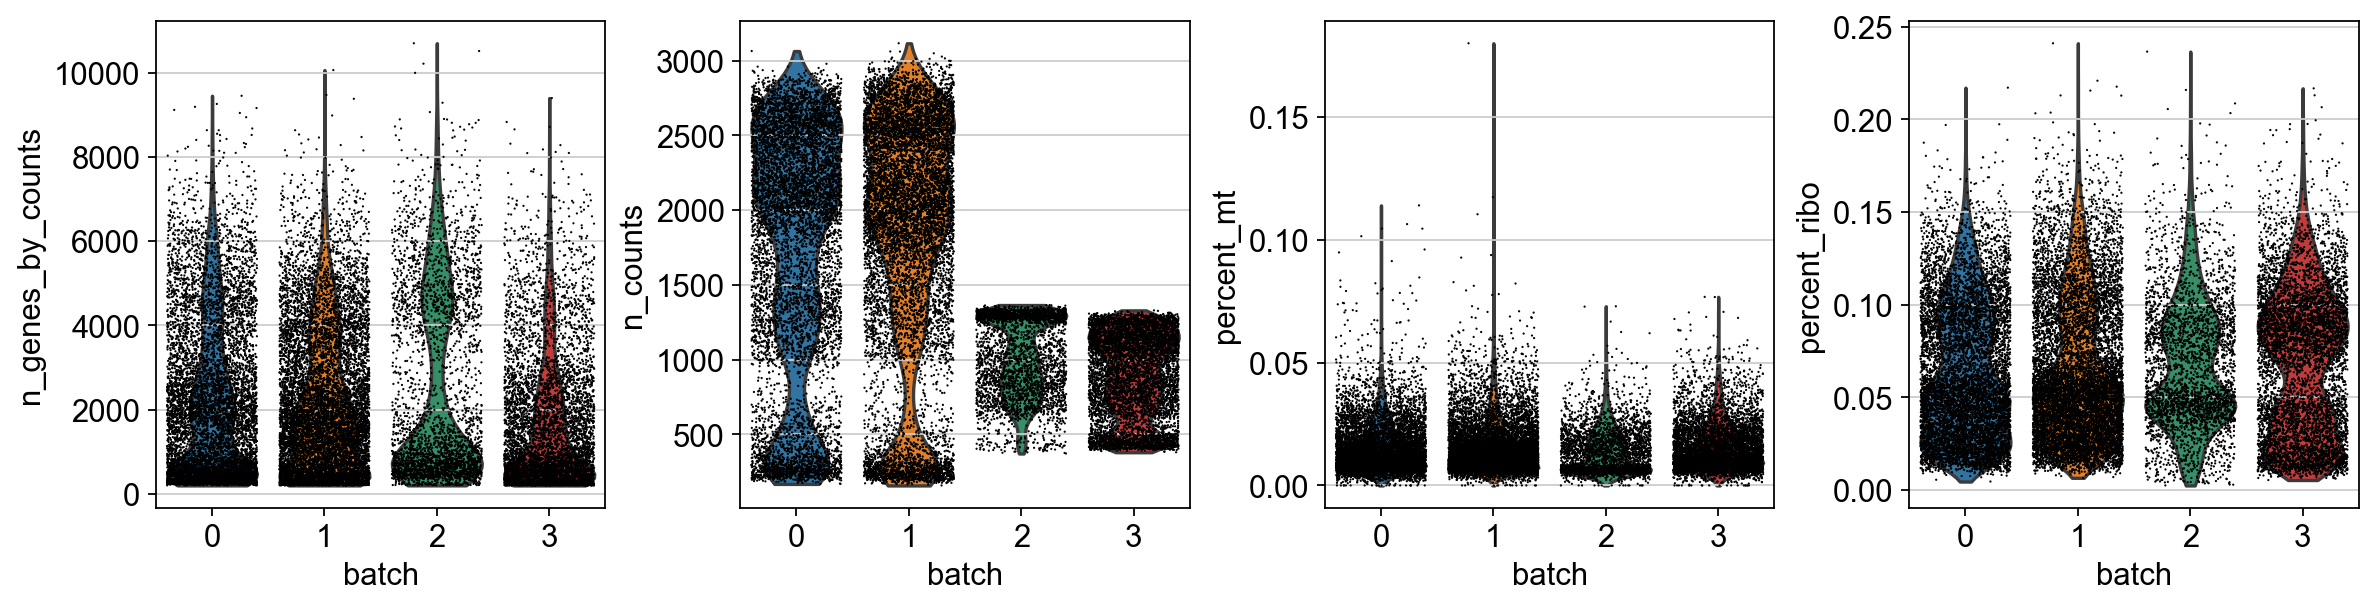

In [74]:
sc.pl.violin(adata, ['n_genes_by_counts', 'n_counts', 'percent_mt','percent_ribo'],
             jitter=0.4, groupby = 'batch')

In [75]:
# filter for percent mito
adata = adata[adata.obs['percent_mt'] < 0.25, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['percent_ribo'] > 0.05, :]

print("Remaining cells %d"%adata.n_obs)

Remaining cells 16431


In [78]:
hb_genes = adata.var_names.str.contains('^Hb[^(P)]')
print(sum(hb_genes))

9


In [80]:
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = adata.var_names.str.startswith('mt-')
hb_genes = adata.var_names.str.contains('^Hb[^(P)]')

remove = np.add(mito_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

16431 19468


In [81]:
adata.raw = adata

In [82]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata)
sc.tl.umap(adata)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:04:14)
computing PCA
    with n_comps=50
    finished (0:00:16)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 32 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [83]:
adata.write('Non_immune_p5_before_harmony_02-15-24.h5ad', compression='gzip')

In [5]:
adata = sc.read('Non_immune_p5_before_harmony_02-15-24.h5ad')

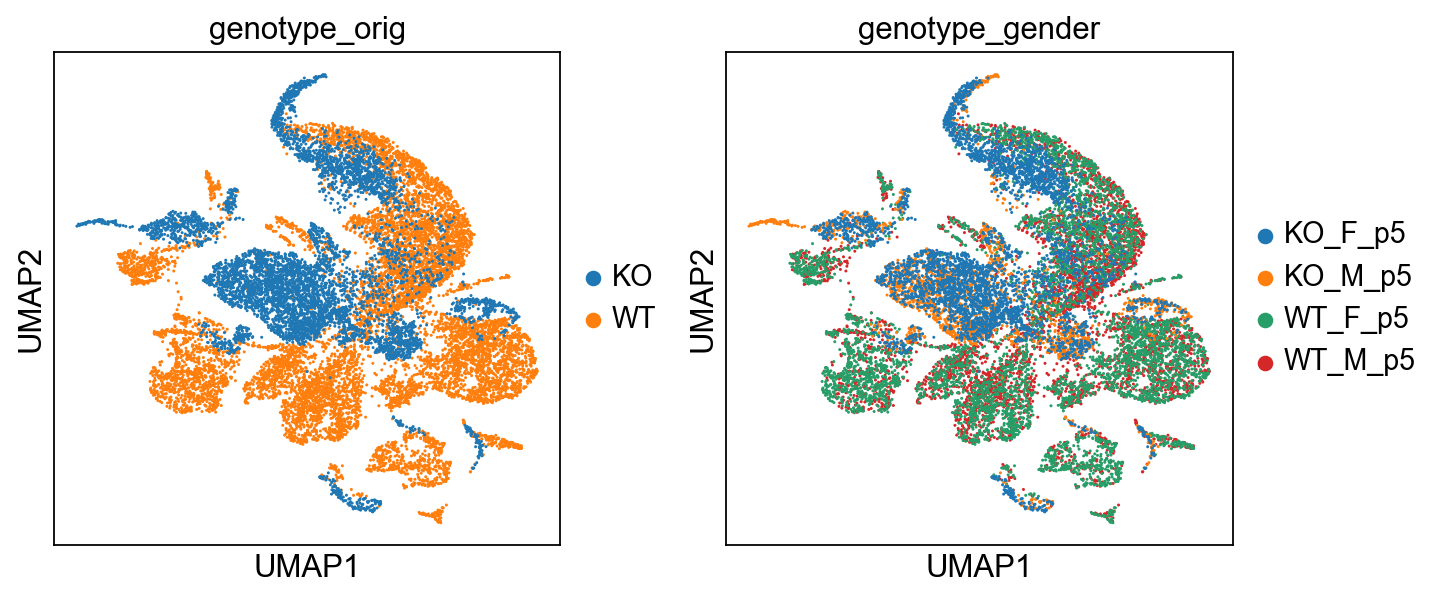

In [85]:
sc.pl.umap(adata, color=['genotype_orig','genotype_gender'], save='_p5_before_harmony.pdf')

In [6]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata, 'batch')
'X_pca_harmony' in adata.obsm
True

2024-02-15 13:20:31,126 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-02-15 13:20:36,335 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-02-15 13:20:36,440 - harmonypy - INFO - Iteration 1 of 10
2024-02-15 13:20:41,165 - harmonypy - INFO - Iteration 2 of 10
2024-02-15 13:20:46,041 - harmonypy - INFO - Iteration 3 of 10
2024-02-15 13:20:50,775 - harmonypy - INFO - Iteration 4 of 10
2024-02-15 13:20:55,526 - harmonypy - INFO - Iteration 5 of 10
2024-02-15 13:21:00,262 - harmonypy - INFO - Iteration 6 of 10
2024-02-15 13:21:05,037 - harmonypy - INFO - Converged after 6 iterations


True

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


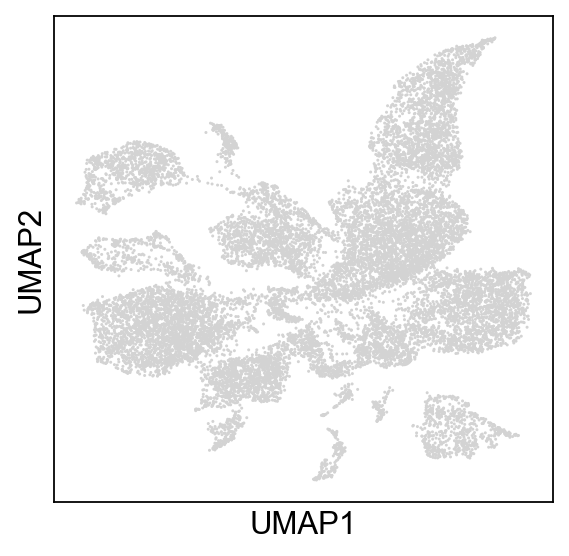

In [7]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata)

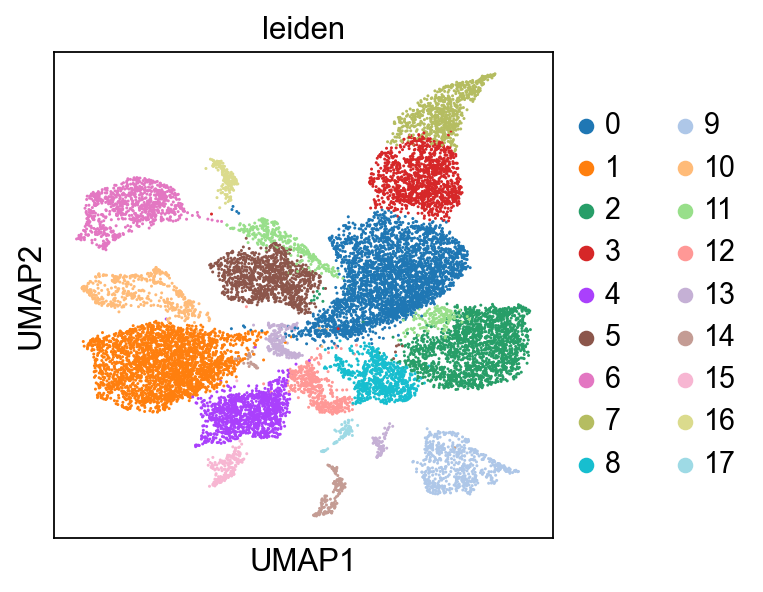

In [8]:
sc.pl.umap(adata, color=['leiden'])

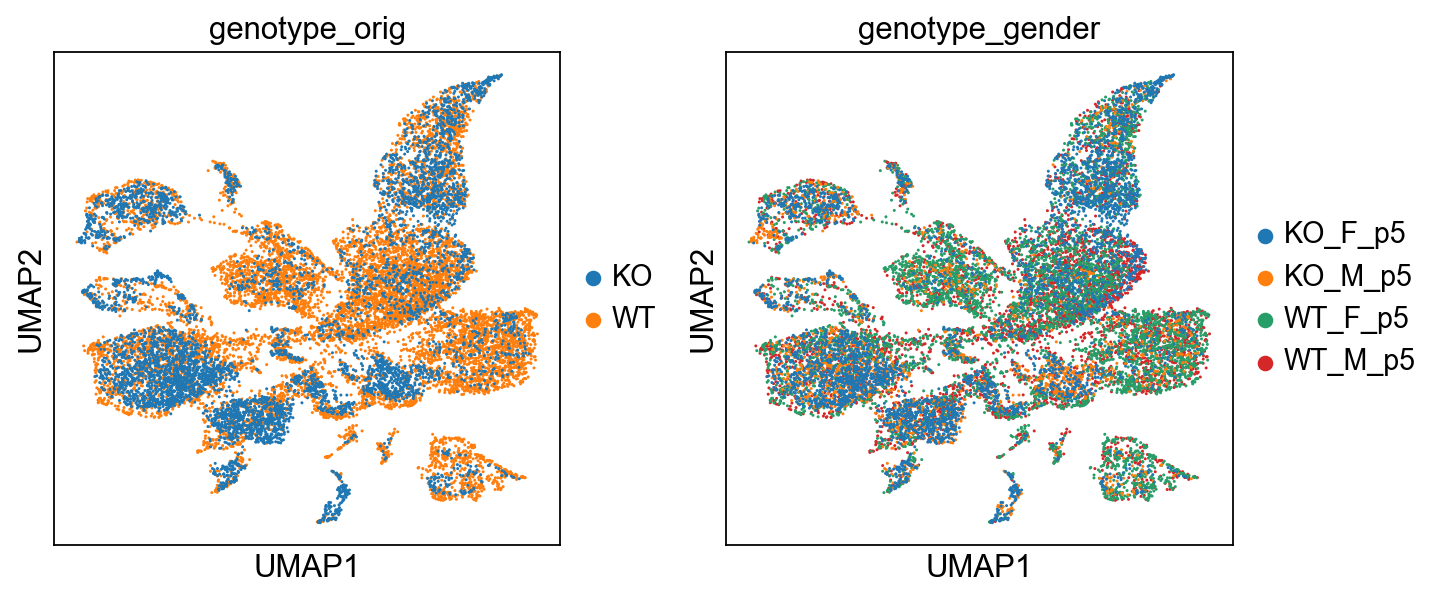

In [9]:
sc.pl.umap(adata, color=['genotype_orig','genotype_gender'], save='_p5_after_harmony.pdf')


In [10]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGCAGTAAT-1-0      910                909   1328.354370   
AAACCCACAGAGAAAG-1-0     3550               3547   2435.883057   
AAACCCACATCAACCA-1-0      660                660   1290.363525   
AAACGAAAGGTCACAG-1-0      836                833   1085.943726   
AAACGAAAGTGGATTA-1-0      407                404    993.085205   
...                       ...                ...           ...   
TTTGGTTAGCTGTGCC-1-3      403                403    632.668213   
TTTGGTTCACATATCG-1-3      749                749    825.536682   
TTTGTTGCATGGGTTT-1-3     1848               1848   1074.240356   
TTTGTTGGTGAACGGT-1-3      240                240    437.326569   
TTTGTTGTCCTCTCTT-1-3      250                250    448.288879   

                      total_counts_mt  pct_counts_mt      tissue genotype  \
AAACCCAAGCAGTAAT-1-0        29.132891       2.193157  cerebellum    WT_p5   
AAACCCACAGAGAAAG-1-0        19.637238       0.806165  cerebellum    WT_p5   
AAACCCACATCAACCA-1-0        22.700634       1.759243  cerebellum    WT_p5   
AAACGAAAGGTCACAG-1-0        29.361643       2.703790  cerebellum    WT_p5   
AAACGAAAGTGGATTA-1-0        24.883888       2.505715  cerebellum    WT_p5   
...                               ...            ...         ...      ...   
TTTGGTTAGCTGTGCC-1-3         1.529785       0.241799  cerebellum    KO_p5   
TTTGGTTCACATATCG-1-3        17.453718       2.114227  cerebellum    KO_p5   
TTTGTTGCATGGGTTT-1-3        12.074157       1.123972  cerebellum    KO_p5   
TTTGTTGGTGAACGGT-1-3        14.411979       3.295473  cerebellum    KO_p5   
TTTGTTGTCCTCTCTT-1-3        16.836567       3.755740  cerebellum    KO_p5   

                     leiden genotype_orig genotype_gender batch  \
AAACCCAAGCAGTAAT-1-0     16            WT         WT_M_p5     0   
AAACCCACAGAGAAAG-1-0      5            WT         WT_M_p5     0   
AAACCCACATCAACCA-1-0      1            WT         WT_M_p5     0   
AAACGAAAGGTCACAG-1-0      4            WT         WT_M_p5     0   
AAACGAAAGTGGATTA-1-0      1            WT         WT_M_p5     0   
...                     ...           ...             ...   ...   
TTTGGTTAGCTGTGCC-1-3      8            KO         KO_F_p5     3   
TTTGGTTCACATATCG-1-3      1            KO         KO_F_p5     3   
TTTGTTGCATGGGTTT-1-3      6            KO         KO_F_p5     3   
TTTGTTGGTGAACGGT-1-3      0            KO         KO_F_p5     3   
TTTGTTGTCCTCTCTT-1-3      3            KO         KO_F_p5     3   

                      total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAACCCAAGCAGTAAT-1-0                0.0              0.0              0.0   
AAACCCACAGAGAAAG-1-0                0.0              0.0              0.0   
AAACCCACATCAACCA-1-0                0.0              0.0              0.0   
AAACGAAAGGTCACAG-1-0                0.0              0.0              0.0   
AAACGAAAGTGGATTA-1-0                0.0              0.0              0.0   
...                                 ...              ...              ...   
TTTGGTTAGCTGTGCC-1-3                0.0              0.0              0.0   
TTTGGTTCACATATCG-1-3                0.0              0.0              0.0   
TTTGTTGCATGGGTTT-1-3                0.0              0.0              0.0   
TTTGTTGGTGAACGGT-1-3                0.0              0.0              0.0   
TTTGTTGTCCTCTCTT-1-3                0.0              0.0              0.0   

                      pct_counts_hb  percent_mt     n_counts  percent_ribo  
AAACCCAAGCAGTAAT-1-0            0.0    0.021932  1328.354370      0.169052  
AAACCCACAGAGAAAG-1-0            0.0    0.008062  2435.883057      0.050973  
AAACCCACATCAACCA-1-0            0.0    0.017592  1290.363525      0.073509  
AAACGAAAGGTCACAG-1-0            0.0    0.027038  1085.943726      0.102994  
AAACGAAAGTGGATTA-1-0            0.0    0.025057   993.085205      0.097709  
...                             ...         ...          ...           ...  
TTTGGTTAGCTGTGCC-1-3            0.0

In [11]:
adata.obs.genotype = adata.obs.genotype.astype('category') 

In [12]:
scv.set_figure_params(style='scvelo', dpi=100, dpi_save=300, frameon=None)

saving figure to file ./figures/scvelo__p5_scatterplot_by_genotype_orig.pdf


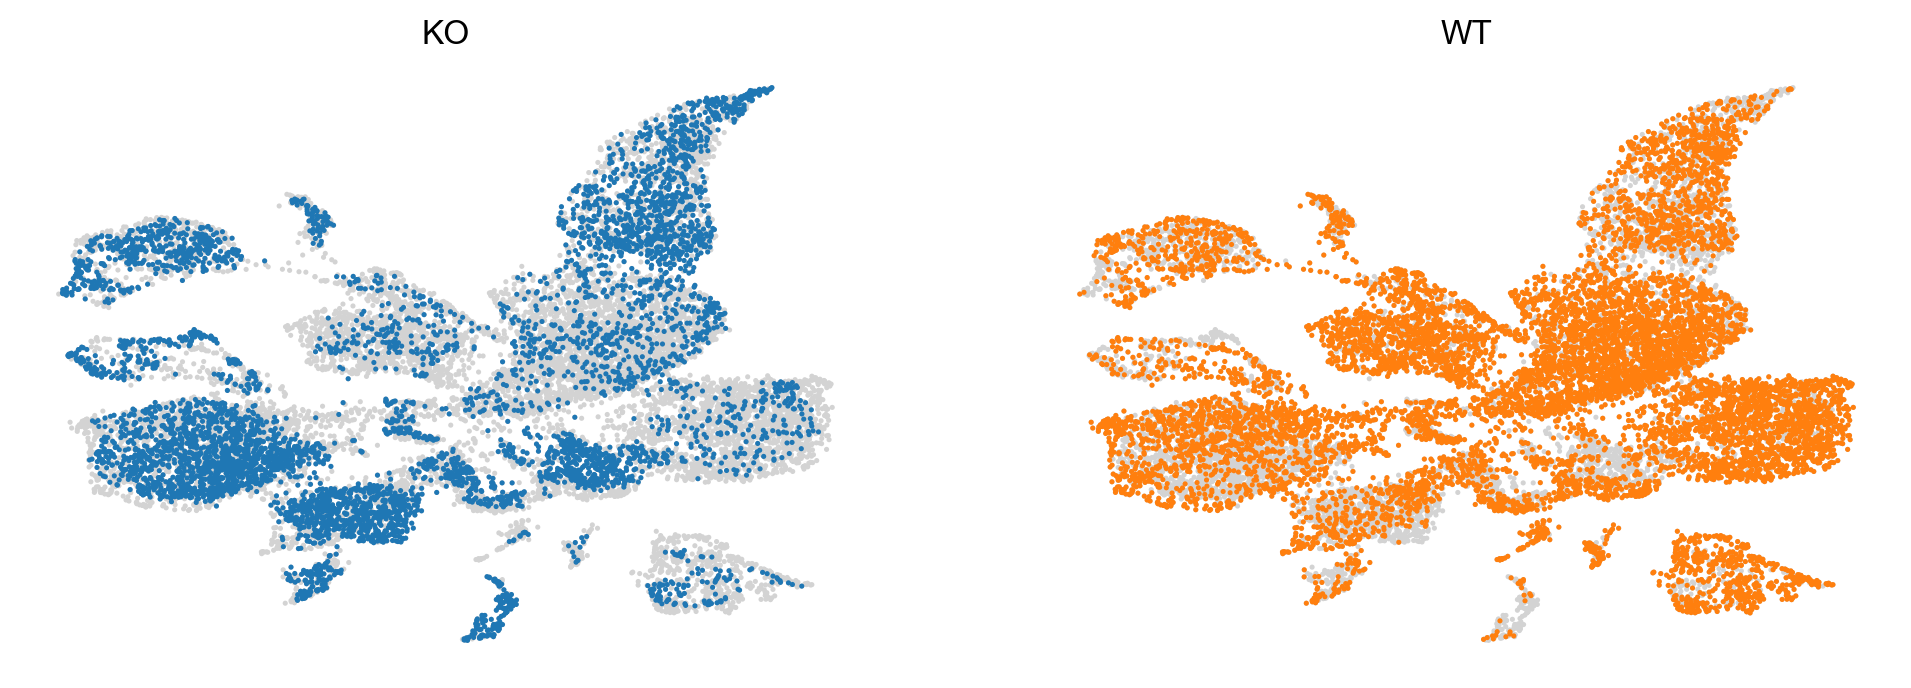

In [13]:
scv.pl.scatter(adata, groups=[[c] for c in adata.obs['genotype_orig'].cat.categories], color='genotype_orig', ncols=4, save="_p5_scatterplot_by_genotype_orig.pdf")

In [10]:
df = pd.crosstab(adata.obs['genotype_orig'], adata.obs['genotype_gender'])
df

genotype_gender  KO_F_p5  KO_M_p5  WT_F_p5  WT_M_p5
genotype_orig                                      
KO                  3992     2056        0        0
WT                     0        0     5622     4761

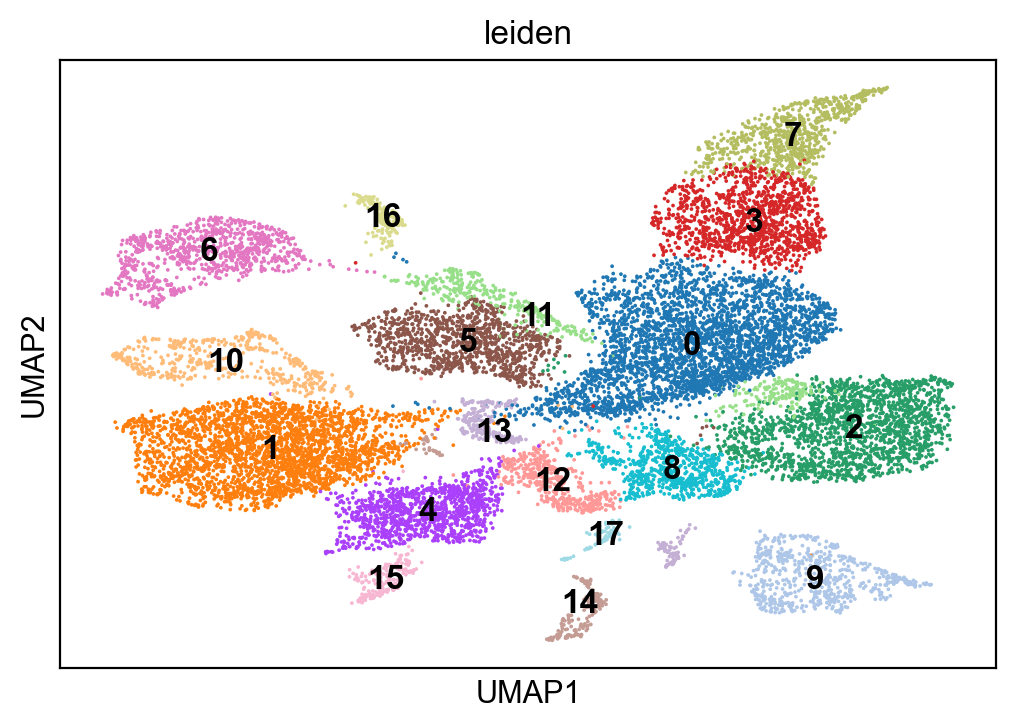

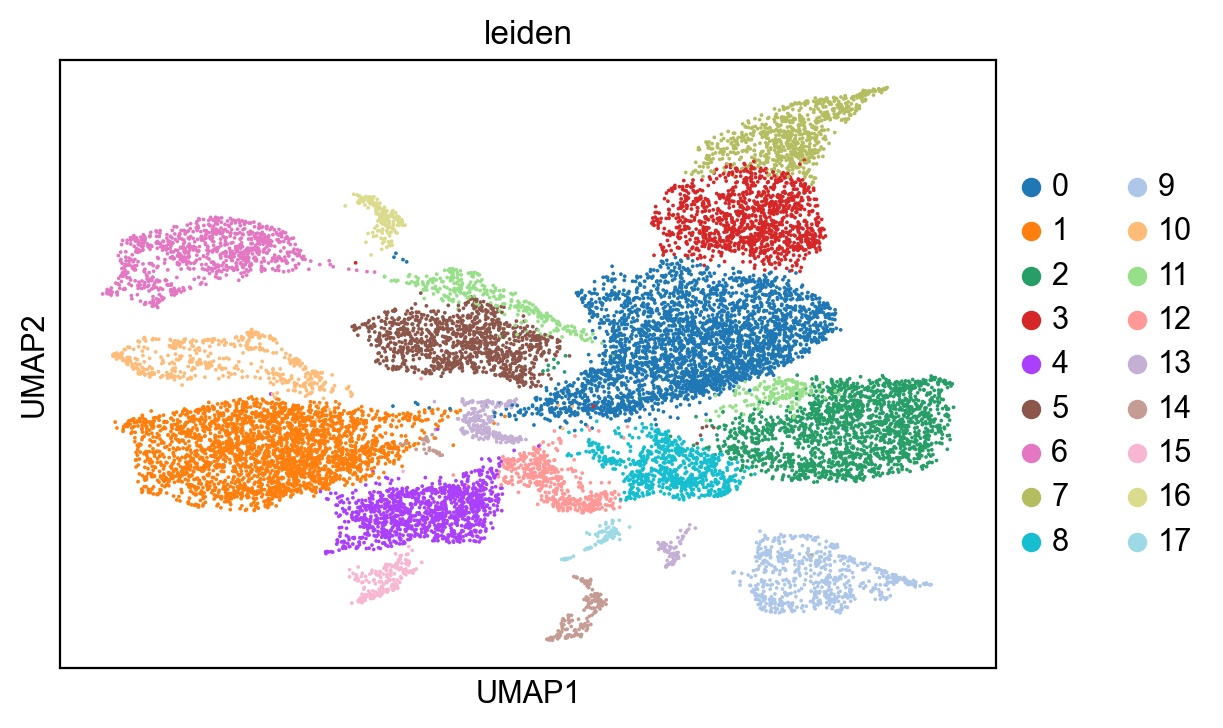

In [14]:
sc.pl.umap(adata, color=['leiden'],legend_loc='on data', save='_non-immune_p5_by_leiden.pdf')
sc.pl.umap(adata, color=['leiden'],legend_loc='right margin', save='_non-immune_p5_by_leiden_1.pdf')

In [15]:
adata.write('Non-immune_p5_after_harmony_02-15-24.h5ad', compression='gzip')

In [5]:
adata = sc.read('Non-immune_p5_after_harmony_02-15-24.h5ad')
adata

AnnData object with n_obs × n_vars = 16431 × 19468
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'percent_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'batch_colors', 'genotype_gender_colors', 'genotype_orig_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca',

# checked

In [17]:
#for cell type annotation
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', use_raw=True,  key_added = "leiden_rank_fgsea")
result = adata.uns['leiden_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', #'scores','logfoldchanges', 'pvals', 'pvals_adj'
                                   ]}).to_csv("D:/KP/mouse_brain_project/p5_DEG_by_leiden_for_annotation_08-18-23.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['leiden_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:23)


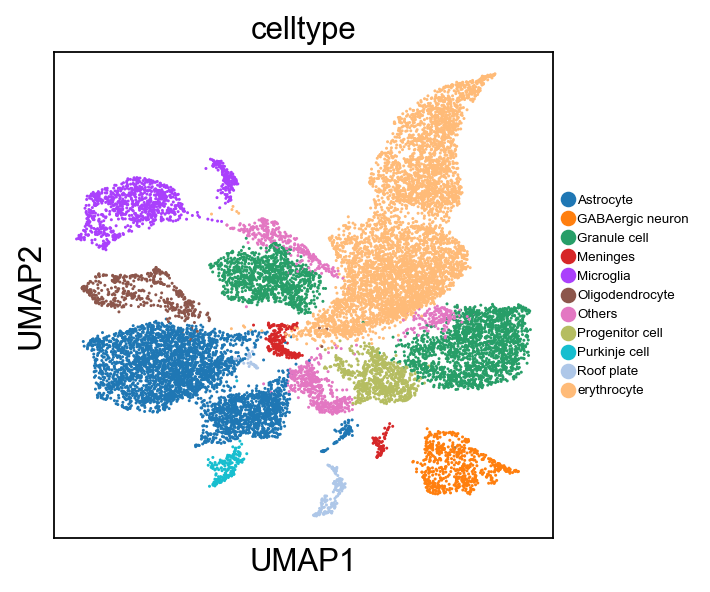

In [11]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'erythrocyte':      ['0', '3','7'],
             'Astrocyte':    ['1','4','15','17' ],
             'Granule cell':  ['2','5'],
             'Microglia':['6','16'],
             'Progenitor cell':        ['8'],
             'GABAergic neuron': ['9'],
             'Oligodendrocyte': ['10'],
             'Meninges': ['13'],
             'Roof plate': ['14'],
             'Purkinje cell':['15'],
             'Others': ['11','12']
             
            }

# Initialize empty column in cell metadata
adata.obs['celltype'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden).isin(cell_dict[i])
    adata.obs.loc[ind,'celltype'] = i

sc.pl.umap(adata, color=['celltype'], legend_loc='right margin', legend_fontsize=6)#, save='_Immune_cells_by_celltype.pdf')


In [18]:
adata.obs['genotype_orig'].cat.reorder_categories(['WT','KO'
],inplace=True)

In [188]:
adata.obs['celltype'].cat.reorder_categories(['Astrocyte','Granule cell',
                                              'Progenitor cell','Meninges','Oligodendrocyte',
                                              'Purkinje cell','erythrocyte','GABAergic neuron',
                                              'Roof plate','Microglia','Others'
],inplace=True)

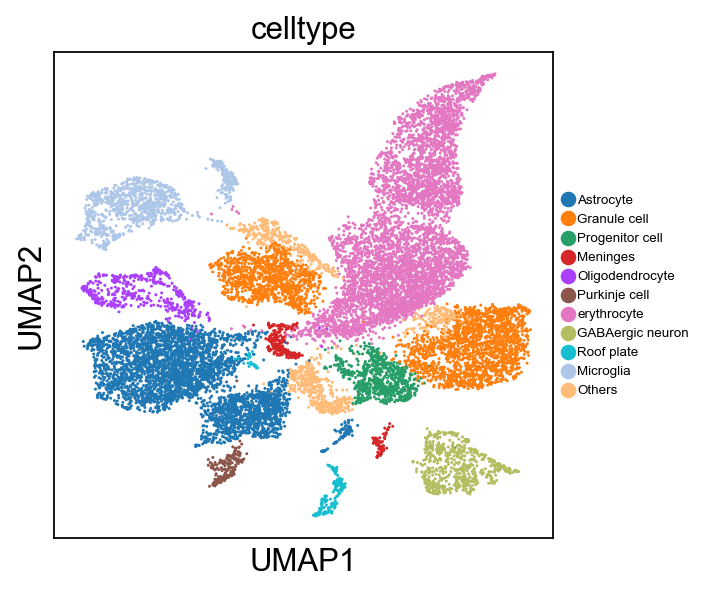

In [189]:
sc.pl.umap(adata, color=['celltype'], legend_loc='right margin', legend_fontsize=6, save='_p5_by_celltype.pdf')

In [47]:
df = pd.crosstab(adata.obs['celltype'], adata.obs['genotype_orig'])
df

genotype_orig       WT    KO
celltype                    
Astrocyte         1784  2126
Granule cell      2479   415
Meninges           231    88
Oligodendrocyte    223   270
Progenitor cell    341   384
Purkinje cell       69   114
erythrocyte       3583  1568
Others             614   293
GABAergic neuron   514   113
Roof plate          47   139
Microglia          498   538

In [48]:
df.to_csv('p5_celltype_by_genotype.csv')

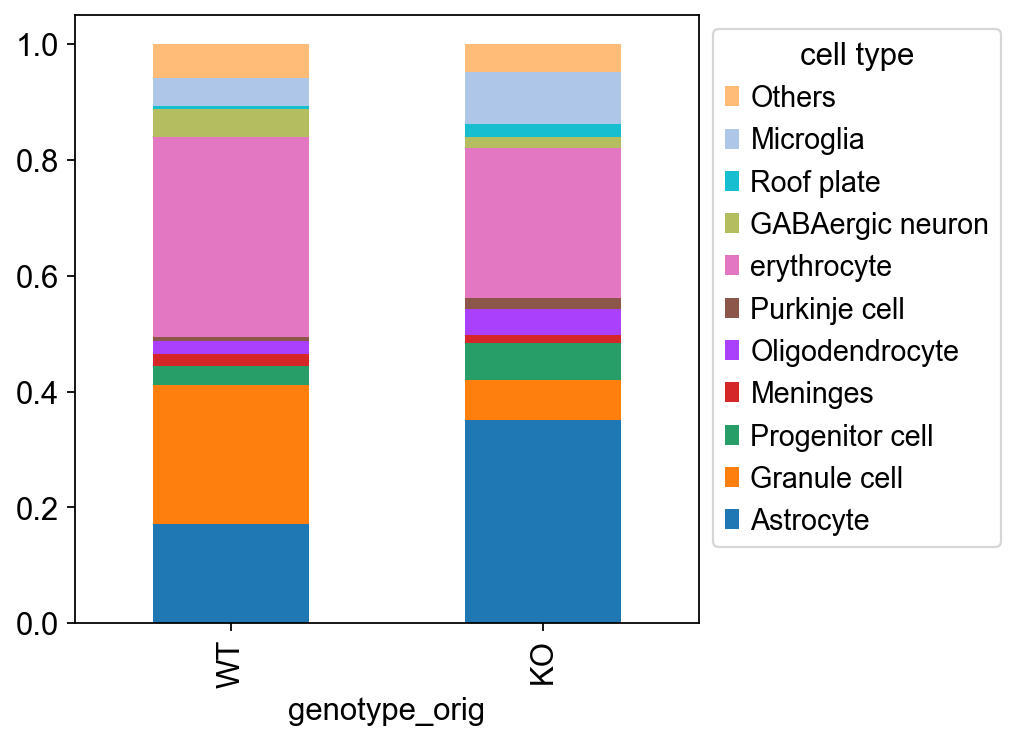

In [190]:
tmp = pd.crosstab(adata.obs['celltype'],adata.obs['genotype_orig'], normalize='columns').T.plot(kind='bar', stacked=True, figsize=(5,5))
handles, labels = tmp.get_legend_handles_labels()
tmp.legend(reversed(handles), reversed(labels), title='cell type', bbox_to_anchor=(1.0, 1.0), frameon='True')  # reverse both handles and labels
tmp.grid(False)
res = tmp.get_figure()
res.savefig('_p5_celltype_stacked_bar.pdf')
#figure.savefig('_p5_celltype_stacked_bar.pdf', dpi=300)

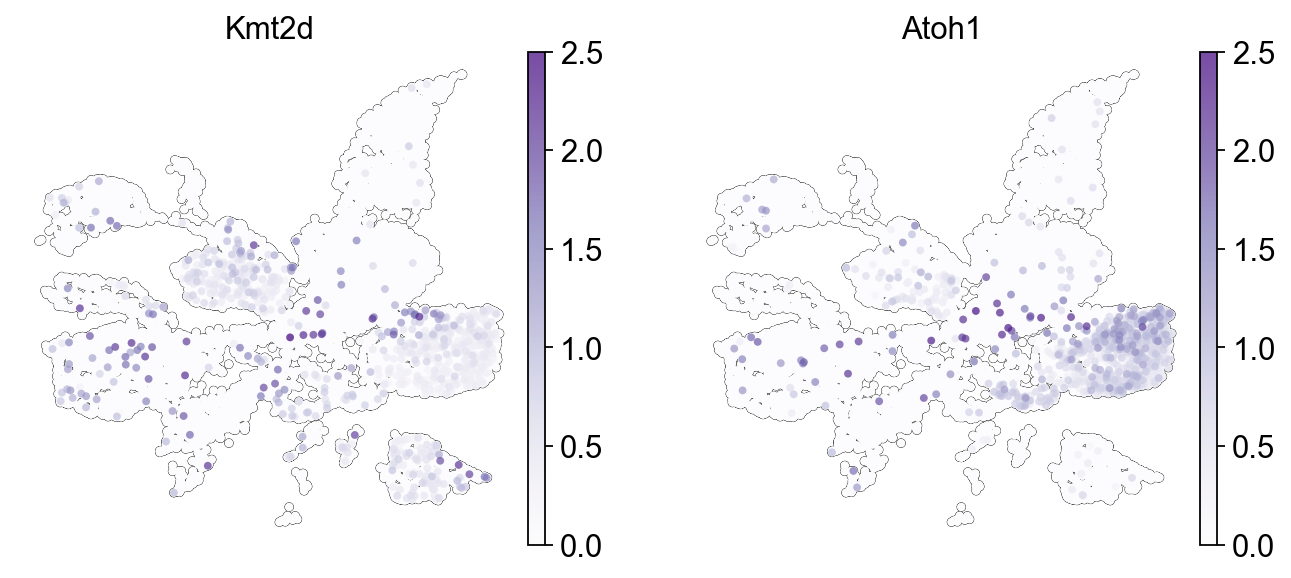

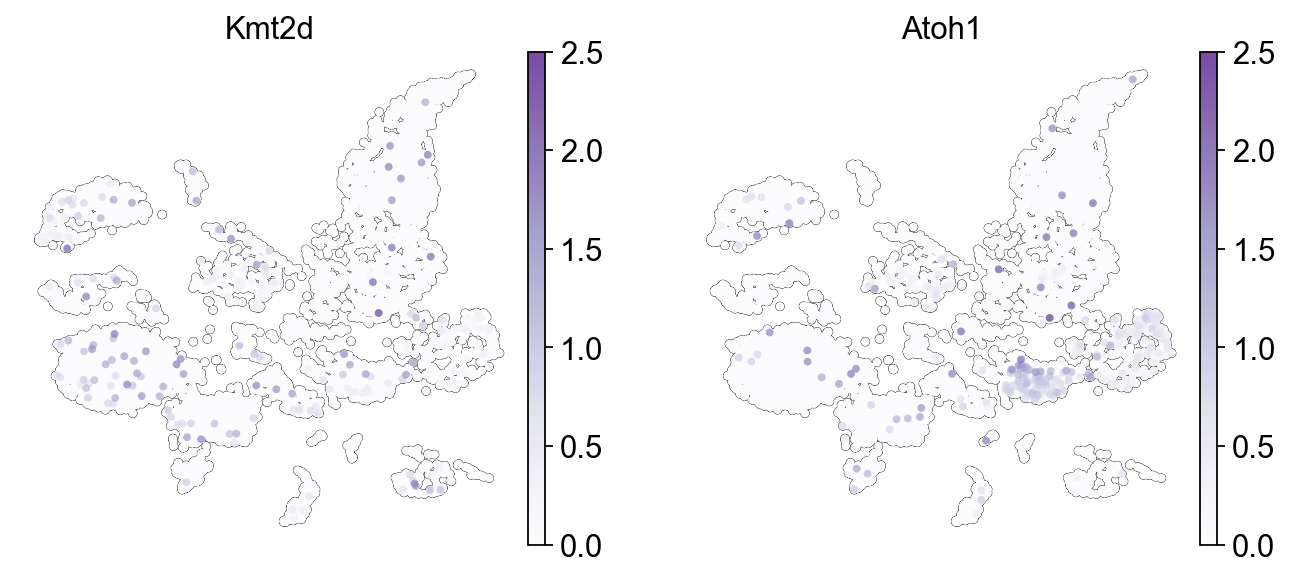

In [59]:
Marker_1 = ['Kmt2d','Atoh1']

sc.pl.umap(adata[adata.obs['genotype_orig']=='WT'], color=Marker_1, legend_loc='right margin', frameon=False, vmin=0, vmax=2.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples', save='_p5_WT_Kmt2d_Atoh1.pdf')
sc.pl.umap(adata[adata.obs['genotype_orig']=='KO'], color=Marker_1, legend_loc='right margin', frameon=False, vmin=0, vmax=2.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples', save='_p5_KO_Kmt2d_Atoh1.pdf')

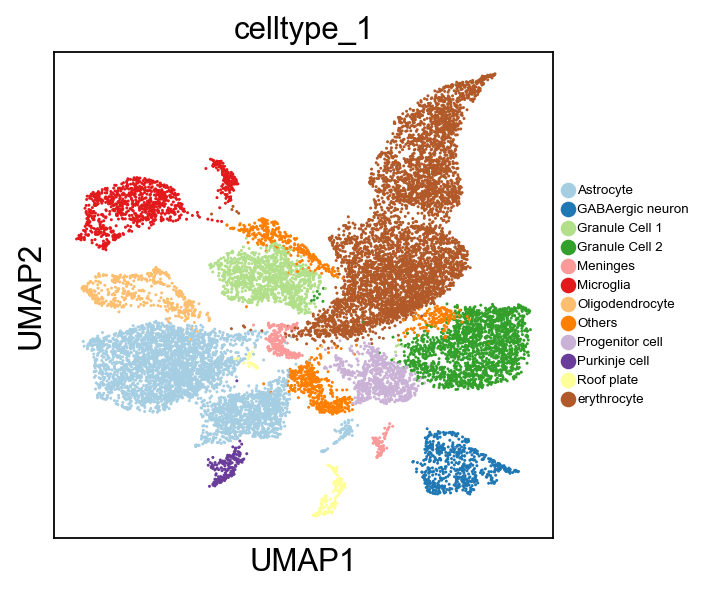

In [153]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'erythrocyte':      ['0', '3','7'],
             'Astrocyte':    ['1','4','15','17' ],
             'Granule Cell 1':  ['5'],
             'Granule Cell 2': ['2'],
             'Microglia':['6','16'],
             'Progenitor cell':        ['8'],
             'GABAergic neuron': ['9'],
             'Oligodendrocyte': ['10'],
             'Meninges': ['13'],
             'Roof plate': ['14'],
             'Purkinje cell':['15'],
             'Others': ['11','12']
             
            }

# Initialize empty column in cell metadata
adata.obs['celltype_1'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden).isin(cell_dict[i])
    adata.obs.loc[ind,'celltype_1'] = i

sc.pl.umap(adata, color=['celltype_1'], legend_loc='right margin', legend_fontsize=6, save='_by_celltype_1.pdf')


In [191]:
adata.obs['celltype_1'].cat.reorder_categories(['Astrocyte','Granule Cell 1','Granule Cell 2','Progenitor cell',
                                                'Meninges','Oligodendrocyte',
                                              'Purkinje cell','erythrocyte','GABAergic neuron',
                                              'Roof plate','Microglia','Others'
],inplace=True)

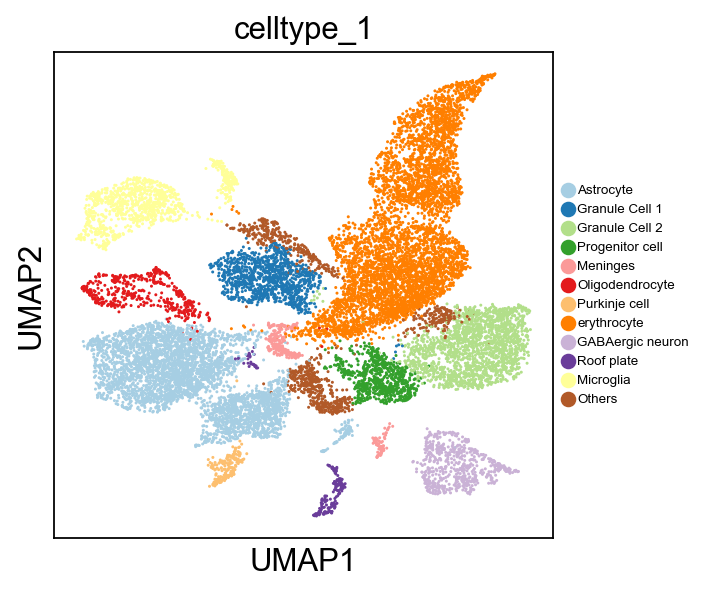

In [192]:
sc.pl.umap(adata, color=['celltype_1'], legend_loc='right margin', legend_fontsize=6, palette='Paired', save='_by_celltype_1.pdf')

In [156]:
adata.write('P5_WT_KO_with_annotation_021924.h5ad')

In [80]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGCAGTAAT-1-0      910                909   1328.354370   
AAACCCACAGAGAAAG-1-0     3550               3547   2435.883057   
AAACCCACATCAACCA-1-0      660                660   1290.363525   
AAACGAAAGGTCACAG-1-0      836                833   1085.943726   
AAACGAAAGTGGATTA-1-0      407                404    993.085205   
...                       ...                ...           ...   
TTTGGTTAGCTGTGCC-1-3      403                403    632.668213   
TTTGGTTCACATATCG-1-3      749                749    825.536682   
TTTGTTGCATGGGTTT-1-3     1848               1848   1074.240356   
TTTGTTGGTGAACGGT-1-3      240                240    437.326569   
TTTGTTGTCCTCTCTT-1-3      250                250    448.288879   

                      total_counts_mt  pct_counts_mt      tissue genotype  \
AAACCCAAGCAGTAAT-1-0        29.132891       2.193157  cerebellum    WT_p5   
AAACCCACAGAGAAAG-1-0        19.637238       0.806165  cerebellum    WT_p5   
AAACCCACATCAACCA-1-0        22.700634       1.759243  cerebellum    WT_p5   
AAACGAAAGGTCACAG-1-0        29.361643       2.703790  cerebellum    WT_p5   
AAACGAAAGTGGATTA-1-0        24.883888       2.505715  cerebellum    WT_p5   
...                               ...            ...         ...      ...   
TTTGGTTAGCTGTGCC-1-3         1.529785       0.241799  cerebellum    KO_p5   
TTTGGTTCACATATCG-1-3        17.453718       2.114227  cerebellum    KO_p5   
TTTGTTGCATGGGTTT-1-3        12.074157       1.123972  cerebellum    KO_p5   
TTTGTTGGTGAACGGT-1-3        14.411979       3.295473  cerebellum    KO_p5   
TTTGTTGTCCTCTCTT-1-3        16.836567       3.755740  cerebellum    KO_p5   

                     leiden genotype_orig genotype_gender batch  \
AAACCCAAGCAGTAAT-1-0     16            WT         WT_M_p5     0   
AAACCCACAGAGAAAG-1-0      5            WT         WT_M_p5     0   
AAACCCACATCAACCA-1-0      1            WT         WT_M_p5     0   
AAACGAAAGGTCACAG-1-0      4            WT         WT_M_p5     0   
AAACGAAAGTGGATTA-1-0      1            WT         WT_M_p5     0   
...                     ...           ...             ...   ...   
TTTGGTTAGCTGTGCC-1-3      8            KO         KO_F_p5     3   
TTTGGTTCACATATCG-1-3      1            KO         KO_F_p5     3   
TTTGTTGCATGGGTTT-1-3      6            KO         KO_F_p5     3   
TTTGTTGGTGAACGGT-1-3      0            KO         KO_F_p5     3   
TTTGTTGTCCTCTCTT-1-3      3            KO         KO_F_p5     3   

                      total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAACCCAAGCAGTAAT-1-0                0.0              0.0              0.0   
AAACCCACAGAGAAAG-1-0                0.0              0.0              0.0   
AAACCCACATCAACCA-1-0                0.0              0.0              0.0   
AAACGAAAGGTCACAG-1-0                0.0              0.0              0.0   
AAACGAAAGTGGATTA-1-0                0.0              0.0              0.0   
...                                 ...              ...              ...   
TTTGGTTAGCTGTGCC-1-3                0.0              0.0              0.0   
TTTGGTTCACATATCG-1-3                0.0              0.0              0.0   
TTTGTTGCATGGGTTT-1-3                0.0              0.0              0.0   
TTTGTTGGTGAACGGT-1-3                0.0              0.0              0.0   
TTTGTTGTCCTCTCTT-1-3                0.0              0.0              0.0   

                      pct_counts_hb  percent_mt     n_counts  percent_ribo  \
AAACCCAAGCAGTAAT-1-0            0.0    0.021932  1328.354370      0.169052   
AAACCCACAGAGAAAG-1-0            0.0    0.008062  2435.883057      0.050973   
AAACCCACATCAACCA-1-0            0.0    0.017592  1290.363525      0.073509   
AAACGAAAGGTCACAG-1-0            0.0    0.027038  1085.943726      0.102994   
AAACGAAAGTGGATTA-1-0            0.0    0.025057   993.085205      0.097709   
...                             ...         ...          ...           ...   
TTTGGTTAGCTGTGCC-1-3        

# For fGSEA

In [157]:
adata_wt = adata[adata.obs['genotype_orig']=='WT']
adata_wt

View of AnnData object with n_obs × n_vars = 10383 × 19468
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'percent_ribo', 'celltype', 'celltype_1'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'batch_colors', 'genotype_gender_colors', 'genotype_orig_colors', 'leiden', 'l

In [158]:
adata_ko = adata[adata.obs['genotype_orig']=='KO']
adata_ko

View of AnnData object with n_obs × n_vars = 6048 × 19468
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'percent_ribo', 'celltype', 'celltype_1'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'batch_colors', 'genotype_gender_colors', 'genotype_orig_colors', 'leiden', 'le

In [159]:
adata_gc1 = adata[adata.obs['celltype_1']=='Granule Cell 1']
adata_gc1

View of AnnData object with n_obs × n_vars = 1069 × 19468
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'percent_ribo', 'celltype', 'celltype_1'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'batch_colors', 'genotype_gender_colors', 'genotype_orig_colors', 'leiden', 'le

In [160]:
adata_gc2 = adata[adata.obs['celltype_1']=='Granule Cell 2']
adata_gc2

View of AnnData object with n_obs × n_vars = 1825 × 19468
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'percent_ribo', 'celltype', 'celltype_1'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'batch_colors', 'genotype_gender_colors', 'genotype_orig_colors', 'leiden', 'le

In [161]:
adata_pc = adata[adata.obs['celltype_1']=='Progenitor cell']
adata_pc

View of AnnData object with n_obs × n_vars = 725 × 19468
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'genotype', 'leiden', 'genotype_orig', 'genotype_gender', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts', 'percent_ribo', 'celltype', 'celltype_1'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'batch_colors', 'genotype_gender_colors', 'genotype_orig_colors', 'leiden', 'lei

In [162]:
#for fGSEA
sc.tl.rank_genes_groups(adata_gc1, groupby='genotype_orig', method='wilcoxon', use_raw=True,  key_added = "GC1_rank_fgsea")
result = adata_gc1.uns['GC1_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("D:/KP/mouse_brain_project/GC1_DEG_by_tissue_for_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['GC1_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [163]:
#for fGSEA
sc.tl.rank_genes_groups(adata_gc2, groupby='genotype_orig', method='wilcoxon', use_raw=True,  key_added = "GC2_rank_fgsea")
result = adata_gc2.uns['GC2_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("D:/KP/mouse_brain_project/GC2_DEG_by_tissue_for_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['GC2_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


In [164]:
#for fGSEA
sc.tl.rank_genes_groups(adata_pc, groupby='genotype_orig', method='wilcoxon', use_raw=True,  key_added = "pc_rank_fgsea")
result = adata_pc.uns['pc_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("D:/KP/mouse_brain_project/PC_DEG_by_tissue_for_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['pc_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


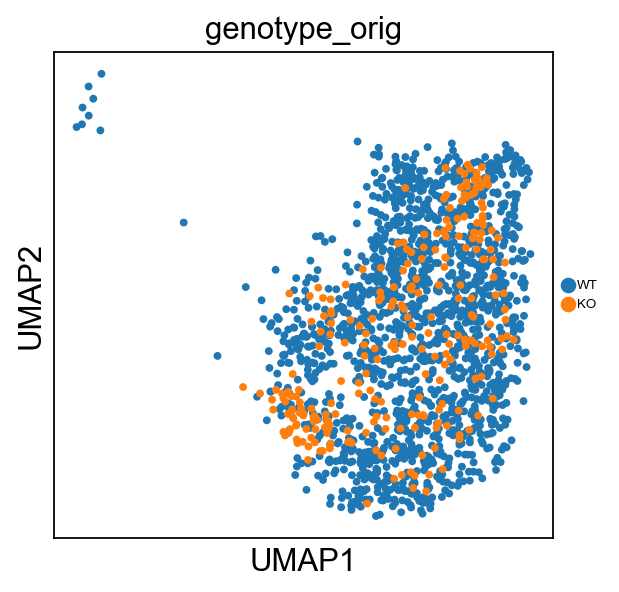

In [99]:
sc.pl.umap(adata_gc1, color=['genotype_orig'], legend_loc='right margin', size=50, legend_fontsize=6)#, palette='Paired', save='_by_celltype_1.pdf')

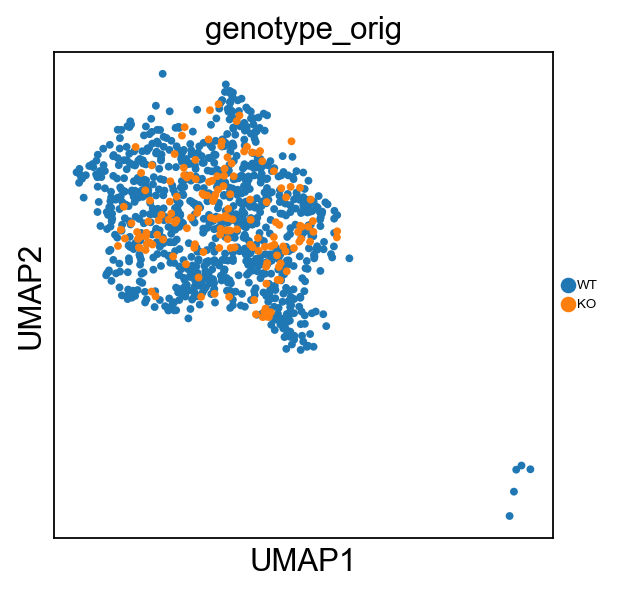

In [100]:
sc.pl.umap(adata_gc2, color=['genotype_orig'], legend_loc='right margin', size=50, legend_fontsize=6)#, palette='Paired', save='_by_celltype_1.pdf')

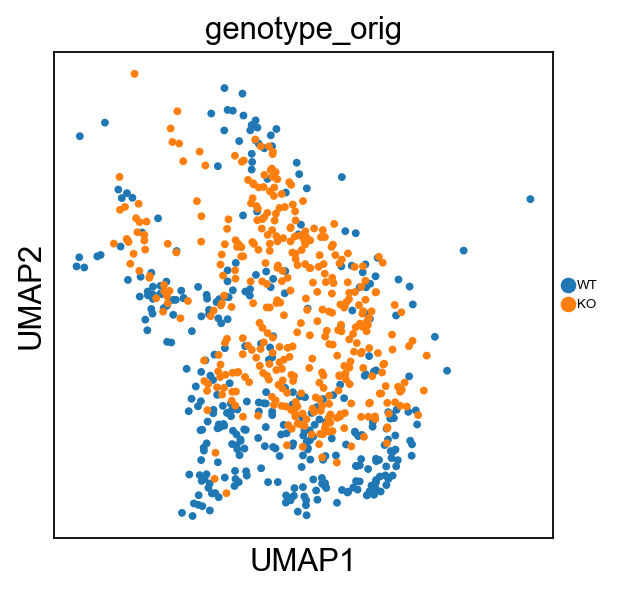

In [101]:
sc.pl.umap(adata_pc, color=['genotype_orig'], legend_loc='right margin', size=50, legend_fontsize=6)#, palette='Paired', save='_by_celltype_1.pdf')

# Heatmap

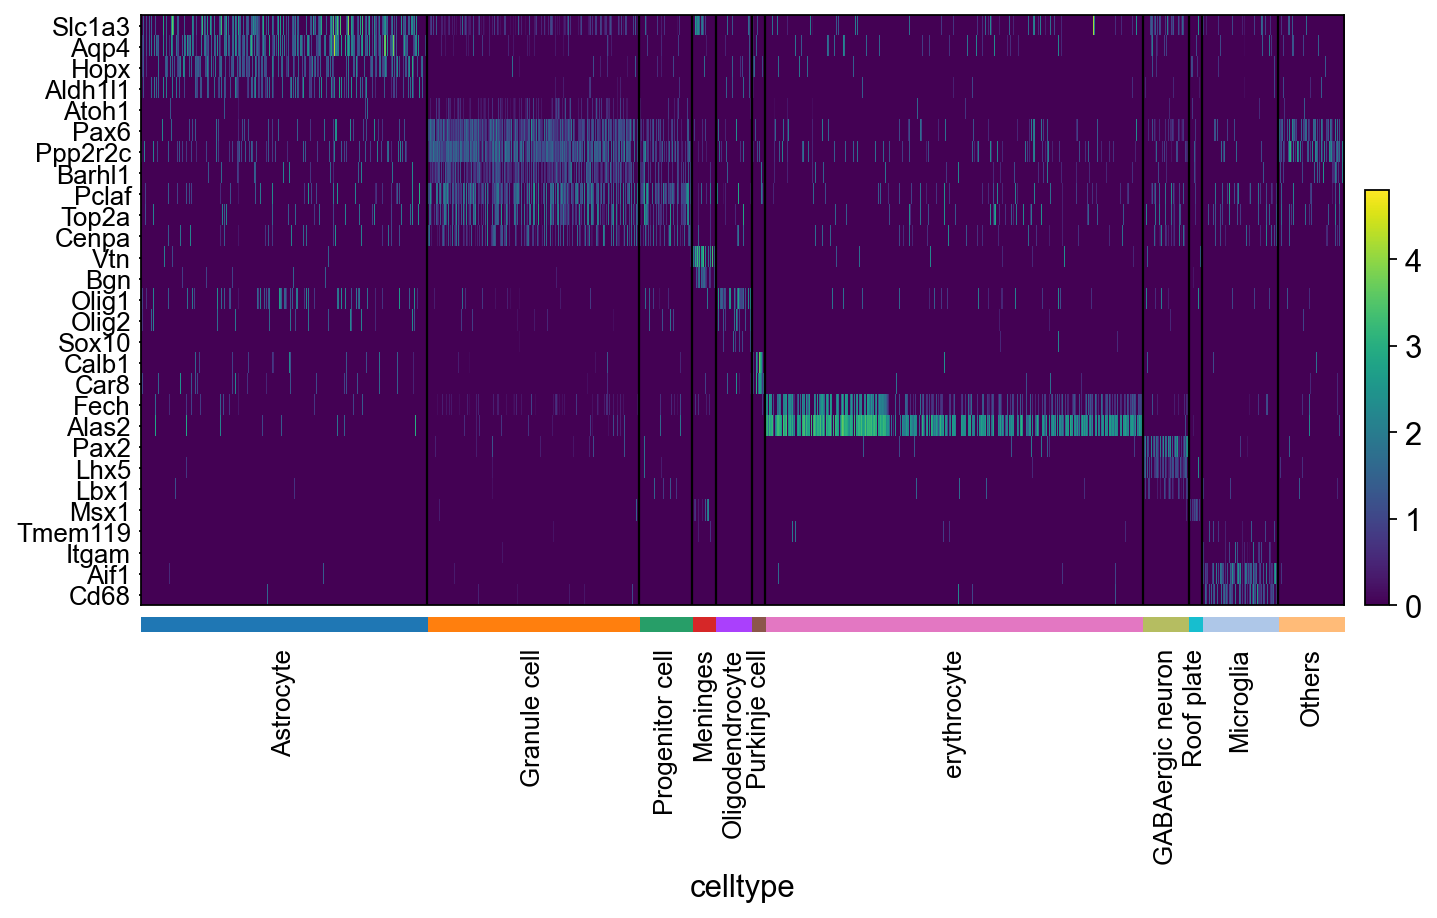

In [197]:
markers = ['Slc1a3','Aqp4','Hopx','Aldh1l1', #Astrocyte
           'Atoh1', 'Pax6', 'Ppp2r2c','Barhl1', #GC
           
           'Pclaf','Top2a','Cenpa',#'Mki67','Cdc20','Hmgn3','Hmgn5', #Dividing cell
           'Vtn','Bgn', #Meninges
           'Olig1','Olig2','Sox10', #Oligodendrocyte
           'Calb1','Car8', #Purkinje cell
           'Fech','Alas2', #erythrocyte
           'Pax2','Lhx5','Lbx1', #GABAergic neuron
           'Msx1', #Roof plate
           'Tmem119','Itgam','Aif1','Cd68' #Microglia
          ]
sc.pl.heatmap(adata, markers, groupby='celltype', swap_axes=True, vmax=4.8, save='_heatmap_by_celltype.pdf')

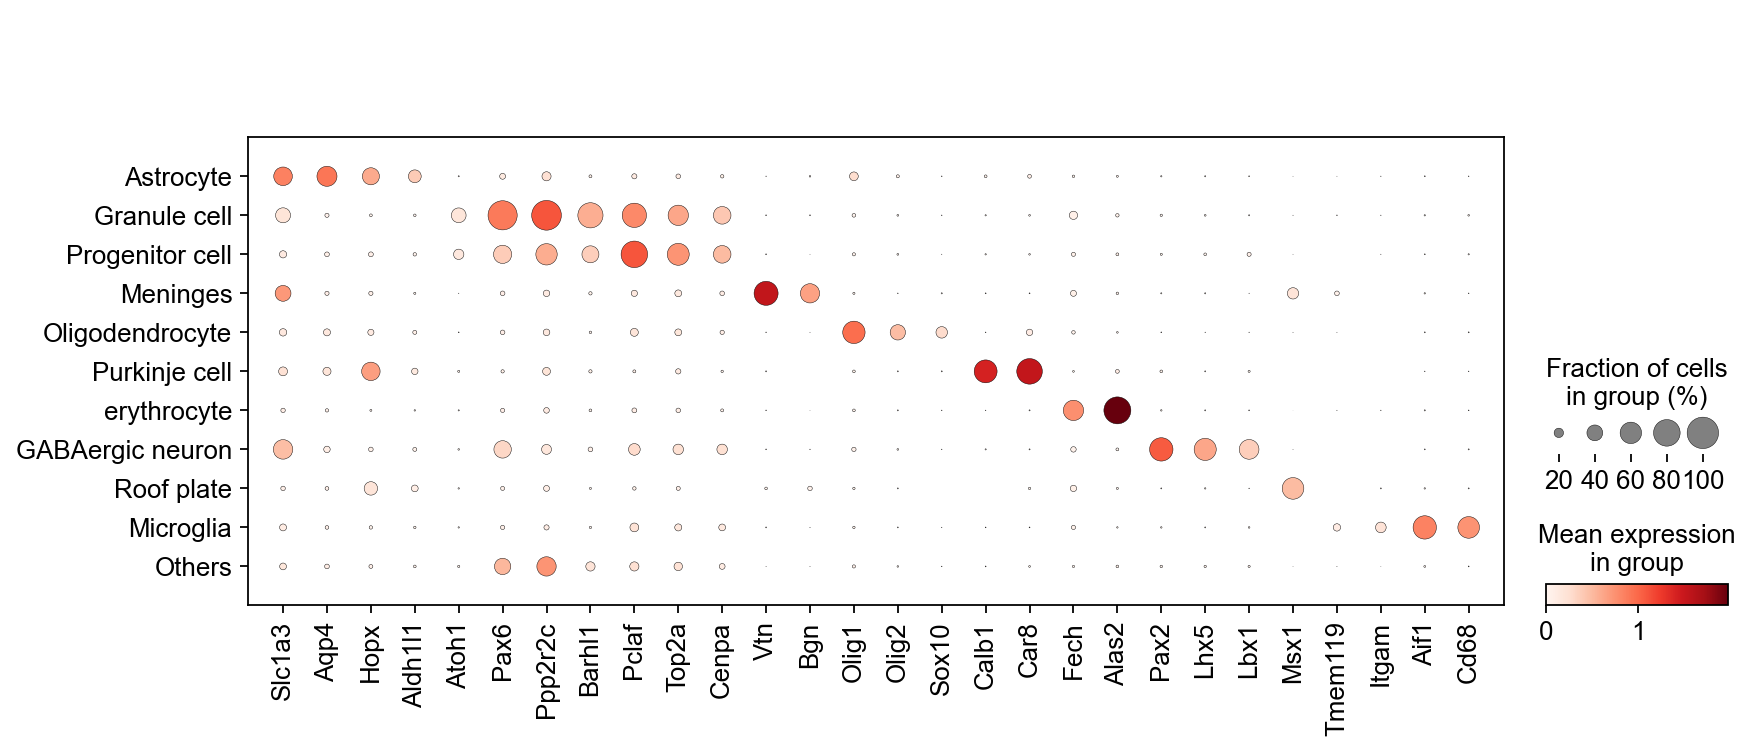

In [204]:
sc.pl.dotplot(adata, markers, groupby='celltype', swap_axes=False, save='_markers_by_celltype.pdf')